# Comparing TCdata360 and Govdata360 indicator lists
Data sources:
- For TCdata360 indicator list: http://tcdata360-backend.worldbank.org/api/v1/indicators/
- For Govdata360 indicator list: http://govdata360-backend.worldbank.org/api/v1/indicators/


## Import Modules

In [134]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

%matplotlib inline

# Data Generation and Preprocessing

## Generate TCdata360 indicator dataset

In [2]:
url ='http://tcdata360-backend.worldbank.org/api/v1/indicators/'
response = requests.get(url)
tc_indicators = pd.read_json(response.text)

In [3]:
tc_indicators.head()

,byPartner,byProduct,dataset,datasetId,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType
0,False,False,World Development Indicators,56,1961-2015,line_chart,Annual percentage growth rate of GDP at market...,"[spider_chart, slope_graph, chord_diagram]",940,GDP growth (annual %),annually,1.001,Value,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...",Annual %,value
1,False,False,WEF: Global Information Technology Report,65,2012-2016,line_chart,"In your country, how easy is it for start-up e...","[spider_chart, chord_diagram]",3386,"Venture capital availability, 1-7 (best)",annually,1.001,Rank,"[2012, 2013, 2014, 2015, 2016]",Rank,rank
2,False,False,WEF: Global Information Technology Report,65,2012-2016,line_chart,"In your country, how easy is it for start-up e...","[spider_chart, slope_graph, chord_diagram]",3385,"Venture capital availability, 1-7 (best)",annually,1.001,Index (1-7),"[2012, 2013, 2014, 2015, 2016]",Index (1-7),value
3,False,False,World Development Indicators,56,1996-2014,line_chart,Expenditures for research and development are ...,"[spider_chart, slope_graph, chord_diagram]",2013,Research and development expenditure (% of GDP),annually,1.001,Value,"[2008, 2007, 2005, 2004, 2003, 2002, 2001, 201...",% of GDP,value
4,False,False,World Development Indicators,56,1970-2015,line_chart,Foreign direct investment are the net inflows ...,"[spider_chart, slope_graph, chord_diagram]",1541,"Foreign direct investment, net inflows (% of GDP)",annually,1.001,Value,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...",% of GDP,value


In [7]:
tc_indicators.shape

(2095, 16)

## Generate Govdata360 indicator dataset

In [4]:
url ='http://govdata360-backend.worldbank.org/api/v1/indicators/'
response = requests.get(url)
gv_indicators = pd.read_json(response.text)

In [5]:
gv_indicators.head()

,byPartner,byProduct,dataset,datasetId,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType
0,False,False,Bertelsmann Transformation Index,505,2006-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24745,Approval of democracy,semianually,1.01,Total,"[2006, 2008, 2010, 2012, 2014, 2016]",Count,Total
1,False,False,Worldwide Governance Indicators,485,1996-2015,line_chart,,"[spider_chart, slope_graph, chord_diagram]",27870,Control of Corruption,annually,1.01,Upper,"[1996, 1998, 2000, 2002, 2003, 2004, 2005, 200...",Count,Upper
2,False,False,Bertelsmann Transformation Index,505,2006-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24741,Independent judiciary,semianually,1.01,Total,"[2006, 2008, 2010, 2012, 2014, 2016]",Count,Total
3,False,False,Country Policy and Institutional Assessments,102,2005-2015,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24784,CPIA business regulatory environment rating 1l...,annually,1.01,Total,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Count,Total
4,False,False,Sustainable Governance Indicators,86,2014-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",27712,Institutional Reform,annually,1.01,Total,"[2014, 2015, 2016]",Count,Total


In [6]:
gv_indicators.shape

(3230, 16)

## Generate dataset files for TCdata360 and Govdata360

In [27]:
url ='http://tcdata360-backend.worldbank.org/api/v1/datasets'
response = requests.get(url)
tc_datasets = pd.read_json(response.text)

In [28]:
url ='http://govdata360-backend.worldbank.org/api/v1/datasets'
response = requests.get(url)
gv_datasets = pd.read_json(response.text)

In [29]:
tc_datasets.head()

,description,id,legal,link,slug,source,title
0,NaN,590,"For use guidelines, please consult PEFA (https...",https://pefa.org/assessments/listing,PEFA,PEFA,PEFA
1,NaN,49,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,enterprise_surveys,WBG - Enterprise Surveys,Enterprise Surveys
2,NaN,50,"For use guidelines, please consult World Bank ...",http://lpi.worldbank.org,logistics_performance_index,WBG - Logistics Performance Index,Logistics Performance Index
3,NaN,51,"For use guidelines, please consult World Bank ...",http://info.worldbank.org/governance/wgi/index...,worldwide_governance_indicators,Worldwide Governance Indicators,Worldwide Governance Indicators
4,NaN,53,"For use guidelines, please consult World Econo...",http://reports.weforum.org/global-competitiven...,global_competitiveness_index,World Economic Forum Global Competitiveness Index,World Economic Forum Global Competitiveness Index


In [30]:
gv_datasets.head()

,description,id,legal,link,slug,source,title
0,NaN,590,"For use guidelines, please consult PEFA (https...",https://pefa.org/assessments/listing,PEFA,PEFA,PEFA
1,NaN,49,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,enterprise_surveys,WBG - Enterprise Surveys,Enterprise Surveys
2,NaN,50,"For use guidelines, please consult World Bank ...",http://lpi.worldbank.org,logistics_performance_index,WBG - Logistics Performance Index,Logistics Performance Index
3,NaN,51,"For use guidelines, please consult World Bank ...",http://info.worldbank.org/governance/wgi/index...,worldwide_governance_indicators,Worldwide Governance Indicators,Worldwide Governance Indicators
4,NaN,53,"For use guidelines, please consult World Econo...",http://reports.weforum.org/global-competitiven...,global_competitiveness_index,World Economic Forum Global Competitiveness Index,World Economic Forum Global Competitiveness Index


In [31]:
gv_datasets.shape, tc_datasets.shape

((76, 7), (76, 7))

In [37]:
col = 'title'
gv_datasets[gv_datasets.duplicated(subset=[col], keep=False)].sort_values(by=col)

,description,id,legal,link,slug,source,title
38,NaN,505,"For use guidelines, please consult Bertelsmann...",https://www.bti-project.org/en/,BTI,Bertelsmann Transformation Index,Bertelsmann Transformation Index
55,NaN,67,"For use guidelines, please consult Bertelsmann...",https://www.bti-project.org/en/,bti,Bertelsmann Transformation Index,Bertelsmann Transformation Index
16,NaN,52,"For use guidelines, please consult World Bank ...",http://www.doingbusiness.org/rankings,doing_business,WBG - Doing Business,Doing Business
23,NaN,435,"For use guidelines, please consult World Bank ...",http://www.doingbusiness.org/rankings,DB,WBG - Doing Business,Doing Business
1,NaN,49,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,enterprise_surveys,WBG - Enterprise Surveys,Enterprise Surveys
75,NaN,99,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,ES,WBG - Enterprise Surveys,Enterprise Surveys
13,NaN,66,"For use guidelines, please consult World Bank ...",http://www.worldbank.org/en/programs/globalfindex,global_financial_inclusion,WB - Financial Inclusion Index (Findex),WB: Financial Inclusion Index (Findex)
44,NaN,509,"For use guidelines, please consult World Bank ...",http://www.worldbank.org/en/programs/globalfindex,"Global Findex 2014, World Bank",WB - Financial Inclusion Index (Findex),WB: Financial Inclusion Index (Findex)
10,NaN,48,"For use guidelines, please consult World Bank ...",http://wbl.worldbank.org,women_business_and_the_law,"WBG - Women, Business and the Law","Women, Business and the Law"
54,NaN,84,"For use guidelines, please consult World Bank ...",http://wbl.worldbank.org,WBL,"WBG - Women, Business and the Law","Women, Business and the Law"


In [38]:
col = 'link'
gv_datasets[gv_datasets.duplicated(subset=[col], keep=False)].sort_values(by=col)

,description,id,legal,link,slug,source,title
3,NaN,51,"For use guidelines, please consult World Bank ...",http://info.worldbank.org/governance/wgi/index...,worldwide_governance_indicators,Worldwide Governance Indicators,Worldwide Governance Indicators
52,NaN,485,"For use guidelines, please consult World Bank ...",http://info.worldbank.org/governance/wgi/index...,WGI,Worldwide Governance Indicators,Worldwide Governance Indicators
4,NaN,53,"For use guidelines, please consult World Econo...",http://reports.weforum.org/global-competitiven...,global_competitiveness_index,World Economic Forum Global Competitiveness Index,World Economic Forum Global Competitiveness Index
60,NaN,430,"For use guidelines, please consult World Econo...",http://reports.weforum.org/global-competitiven...,GCI,WEF - Global Competitiveness Index,Global Competitiveness Index
54,NaN,84,"For use guidelines, please consult World Bank ...",http://wbl.worldbank.org,WBL,"WBG - Women, Business and the Law","Women, Business and the Law"
10,NaN,48,"For use guidelines, please consult World Bank ...",http://wbl.worldbank.org,women_business_and_the_law,"WBG - Women, Business and the Law","Women, Business and the Law"
23,NaN,435,"For use guidelines, please consult World Bank ...",http://www.doingbusiness.org/rankings,DB,WBG - Doing Business,Doing Business
16,NaN,52,"For use guidelines, please consult World Bank ...",http://www.doingbusiness.org/rankings,doing_business,WBG - Doing Business,Doing Business
1,NaN,49,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,enterprise_surveys,WBG - Enterprise Surveys,Enterprise Surveys
75,NaN,99,"For use guidelines, please consult World Bank ...",http://www.enterprisesurveys.org,ES,WBG - Enterprise Surveys,Enterprise Surveys


# Comparing TCdata360 and Govdata360 indicator lists

## Methodology 1: Shortlist by closest text match

### Normalizing and tokenizing indicator names

In [89]:
from nltk import stem, tokenize

stemmer = stem.PorterStemmer() 
def normalize(s):
    words = tokenize.wordpunct_tokenize(s.lower().strip())
    return ' '.join([stemmer.stem(w) for w in words])

In [90]:
tc_indicators['name_lower'] = tc_indicators['name'].apply(lambda x: x.lower().strip())
gv_indicators['name_lower'] = gv_indicators['name'].apply(lambda x: x.lower().strip())

In [91]:
tc_indicators['name_norm'] = tc_indicators['name'].apply(normalize)
gv_indicators['name_norm'] = gv_indicators['name'].apply(normalize)

In [93]:
tc_indicators.head()

,byPartner,byProduct,dataset,datasetId,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType,name_lower,name_norm
0,False,False,World Development Indicators,56,1961-2015,line_chart,Annual percentage growth rate of GDP at market...,"[spider_chart, slope_graph, chord_diagram]",940,GDP growth (annual %),annually,1.001,Value,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...",Annual %,value,gdp growth (annual %),gdp growth ( annual %)
1,False,False,WEF: Global Information Technology Report,65,2012-2016,line_chart,"In your country, how easy is it for start-up e...","[spider_chart, chord_diagram]",3386,"Venture capital availability, 1-7 (best)",annually,1.001,Rank,"[2012, 2013, 2014, 2015, 2016]",Rank,rank,"venture capital availability, 1-7 (best)","ventur capit avail , 1 - 7 ( best )"
2,False,False,WEF: Global Information Technology Report,65,2012-2016,line_chart,"In your country, how easy is it for start-up e...","[spider_chart, slope_graph, chord_diagram]",3385,"Venture capital availability, 1-7 (best)",annually,1.001,Index (1-7),"[2012, 2013, 2014, 2015, 2016]",Index (1-7),value,"venture capital availability, 1-7 (best)","ventur capit avail , 1 - 7 ( best )"
3,False,False,World Development Indicators,56,1996-2014,line_chart,Expenditures for research and development are ...,"[spider_chart, slope_graph, chord_diagram]",2013,Research and development expenditure (% of GDP),annually,1.001,Value,"[2008, 2007, 2005, 2004, 2003, 2002, 2001, 201...",% of GDP,value,research and development expenditure (% of gdp),research and develop expenditur (% of gdp )
4,False,False,World Development Indicators,56,1970-2015,line_chart,Foreign direct investment are the net inflows ...,"[spider_chart, slope_graph, chord_diagram]",1541,"Foreign direct investment, net inflows (% of GDP)",annually,1.001,Value,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...",% of GDP,value,"foreign direct investment, net inflows (% of gdp)","foreign direct invest , net inflow (% of gdp )"


In [94]:
gv_indicators.head()

,byPartner,byProduct,dataset,datasetId,dateRange,defaultViz,definition,doNotUseViz,id,name,periodicity,rank,subindicatorType,timeframes,units,valueType,name_lower,name_norm
0,False,False,Bertelsmann Transformation Index,505,2006-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24745,Approval of democracy,semianually,1.01,Total,"[2006, 2008, 2010, 2012, 2014, 2016]",Count,Total,approval of democracy,approv of democraci
1,False,False,Worldwide Governance Indicators,485,1996-2015,line_chart,,"[spider_chart, slope_graph, chord_diagram]",27870,Control of Corruption,annually,1.01,Upper,"[1996, 1998, 2000, 2002, 2003, 2004, 2005, 200...",Count,Upper,control of corruption,control of corrupt
2,False,False,Bertelsmann Transformation Index,505,2006-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24741,Independent judiciary,semianually,1.01,Total,"[2006, 2008, 2010, 2012, 2014, 2016]",Count,Total,independent judiciary,independ judiciari
3,False,False,Country Policy and Institutional Assessments,102,2005-2015,line_chart,,"[spider_chart, slope_graph, chord_diagram]",24784,CPIA business regulatory environment rating 1l...,annually,1.01,Total,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Count,Total,cpia business regulatory environment rating 1l...,cpia busi regulatori environ rate 1low to 6high
4,False,False,Sustainable Governance Indicators,86,2014-2016,line_chart,,"[spider_chart, slope_graph, chord_diagram]",27712,Institutional Reform,annually,1.01,Total,"[2014, 2015, 2016]",Count,Total,institutional reform,institut reform


### Using `nltk` - Levenshtein distance
Levenshtein distance (LD) is a measure of the similarity between two strings, which we will refer to as the source string (s) and the target string (t). The distance is the number of deletions, insertions, or substitutions required to transform s into t. For example,
- If s is "test" and t is "test", then LD(s,t) = 0, because no transformations are needed. The strings are already identical.
- If s is "test" and t is "tent", then LD(s,t) = 1, because one substitution (change "s" to "n") is sufficient to transform s into t.

The greater the Levenshtein distance, the more different the strings are.

In [419]:
tc_list = list(set(tc_indicators['name_lower']))
gv_list = list(set(gv_indicators['name_lower']))

name_lower_comparison = []
for tc_ind in tc_list:
    for gv_ind in gv_list:
        name_lower_comparison.append([tc_ind, gv_ind, distance.edit_distance(tc_ind, gv_ind)])

KeyboardInterrupt: 

In [ ]:
name_lower_comparison.head()

### Using  `fuzzywuzzy` token_set_ratio and partial_ratio for comparing indicators

In [ ]:
tc_list = list(set(tc_indicators['name_lower']))
gv_list = list(set(gv_indicators['name_lower']))

name_lower_comparison_fuzz = []
for gv_ind in gv_list:
    for tc_ind in tc_list:
        name_lower_comparison_fuzz.append([gv_ind,tc_ind, fuzz.ratio(gv_ind,tc_ind), fuzz.partial_ratio(gv_ind,tc_ind), fuzz.token_sort_ratio(gv_ind,tc_ind),  fuzz.token_set_ratio(gv_ind,tc_ind)])

df_name_lower_comparison_fuzz = pd.DataFrame(name_lower_comparison_fuzz, columns = df_cols)
df_name_lower_comparison_fuzz['stat_mean'] = df_name_lower_comparison_fuzz[fuzz_stats].mean(axis=1)
df_rank = df_name_lower_comparison_fuzz.groupby('gv_indicator')[fuzz_stats].rank(axis=0, ascending=False)
df_rank['stat_mean'] = df_rank.mean(axis=1)
df_name_lower_comparison_fuzz_stats = df_name_lower_comparison_fuzz.join(df_rank, rsuffix='_rank')

df_name_lower_comparison_fuzz_stats['source_dataset'] = dataset[0]

In [ ]:
df_name_lower_comparison_fuzz_stats.head()

## Methodology 2: Shortlist per common dataset
Assumption: ease in API ingestion only works if the dataset for both TCdata360 and Govdata360 indicators are the same. Even if it's the same indicator name but coming from different dataset sources for TCdata360 and Govdata360, the matching doesn't apply.

### Shortlist common datasets

In [14]:
set(tc_indicators['dataset'])

{'Bertelsmann Transformation Index',
 'Citizen Engagement in Rulemaking',
 'Competitive Industrial Performance Index',
 'Direction of Trade',
 'Doing Business',
 'ESCAP',
 'Enabling the Business of Agriculture',
 'Enterprise Surveys',
 'Entrepreneurship at a Glance',
 'Environmental Performance Index',
 'Global Entrepreneurship Monitor Adult Population Survey',
 'Global Entrepreneurship Monitor National Expert Survey',
 'Heritage Index of Economic Freedom',
 'I-TIP Goods',
 'I-TIP Services',
 'ITU Database',
 'Investing Across Borders',
 'Logistics Performance Index',
 'Measuring Export Competitiveness',
 'Networked Readiness index',
 'OECD Innovation Indicators',
 'OECD Product Market Regulation Database',
 'Services Trade Restrictiveness Index',
 'Sustainable Energy For All',
 'Temporary Trade Barriers Database',
 'Timely Indicators of Entrepreneurship',
 'Trade in Value Added',
 'Travel & Tourism Competitiveness Index',
 'UNCTAD',
 'UNCTAD Cyberlaw Tracker',
 'UPU',
 'United Nations

In [13]:
set(gv_indicators['dataset'])

{'Bertelsmann Transformation Index',
 'Corruption Perceptions Index',
 'Country Policy and Institutional Assessments',
 'Doing Business',
 'Enterprise Surveys',
 'Failed States Index',
 'Fiscal Rules Dataset',
 'Global Competitiveness Index',
 'Global Indicators of Regulatory Governance',
 'Global Integrity Index',
 'Human Resource Management',
 'IBP Open Budget Index',
 'Ibrahim Index of African Governance',
 'Inter-Parliamentary Union',
 'PEFA',
 'Pay and Employment',
 'Polity IV',
 'Public Accountability Mechanisms Freedom of Information',
 'Public Accountability Mechanisms Income and Disclosure',
 'Public Investment Management',
 'Quality of Govt',
 'Statistical Capacity',
 'Sustainable Governance Indicators',
 'Women, Business and the Law',
 'World Justice Project',
 'Worldwide Governance Indicators'}

In [39]:
common_datasets = list(set(tc_indicators['dataset']) & set(gv_indicators['dataset'])) + ['World Economic Forum Global Competitiveness Index', 'Global Competitiveness Index']
common_datasets

['Bertelsmann Transformation Index',
 'Worldwide Governance Indicators',
 'Enterprise Surveys',
 'Doing Business',
 'Women, Business and the Law',
 'World Economic Forum Global Competitiveness Index',
 'Global Competitiveness Index']

In [43]:
gv_indicators[gv_indicators['dataset'].isin(common_datasets)].shape

(524, 16)

In [42]:
tc_indicators[tc_indicators['dataset'].isin(common_datasets)].shape

(602, 16)

### Comparing by common dataset

In [113]:
common_datasets = [[dataset] for dataset in list(set(tc_indicators['dataset']) & set(gv_indicators['dataset']))] + [['World Economic Forum Global Competitiveness Index', 'Global Competitiveness Index']]
common_datasets

[['Bertelsmann Transformation Index'],
 ['Worldwide Governance Indicators'],
 ['Enterprise Surveys'],
 ['Doing Business'],
 ['Women, Business and the Law'],
 ['World Economic Forum Global Competitiveness Index',
  'Global Competitiveness Index']]

In [150]:
dataset_count = {}
for dataset in common_datasets:
    tc_count = tc_indicators[tc_indicators['dataset'].isin(dataset)].shape[0]
    gv_count = gv_indicators[gv_indicators['dataset'].isin(dataset)].shape[0]
    dataset_count[dataset[0]] = [tc_count, gv_count]

In [151]:
df_dataset_count = pd.DataFrame(dataset_count).T
df_dataset_count.columns = ['tc_indicator_count', 'gv_indicator_count']

In [152]:
df_dataset_count

,tc_indicator_count,gv_indicator_count
Bertelsmann Transformation Index,3,52
Doing Business,76,108
Enterprise Surveys,121,118
"Women, Business and the Law",132,132
World Economic Forum Global Competitiveness Index,240,108
Worldwide Governance Indicators,30,6


### Using `nltk` Levenshtein distance
We test the algorithm on one dataset to see its results.

In [275]:
dataset = common_datasets[0]
tc_indicators_shortlist = tc_indicators[tc_indicators['dataset'].isin(dataset)]
gv_indicators_shortlist = gv_indicators[gv_indicators['dataset'].isin(dataset)]

tc_list = list(set(tc_indicators_shortlist['name_lower']))
gv_list = list(set(gv_indicators_shortlist['name_lower']))

In [277]:
name_lower_comparison = []
for tc_ind in tc_list:
    for gv_ind in gv_list:
        name_lower_comparison.append([tc_ind, gv_ind, distance.edit_distance(tc_ind, gv_ind)])

In [ ]:
df_name_lower_comparison = pd.DataFrame(name_lower_comparison, columns = ['tc_indicator', 'gv_indicator', 'levenshtein_distance'])

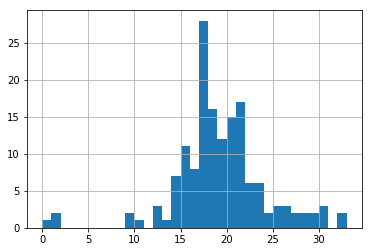

In [156]:
df_name_lower_comparison['levenshtein_distance'].hist(bins=np.arange(0,df_name_lower_comparison['levenshtein_distance'].max(),1))

In [167]:
df_name_lower_comparison_shortlist = df_name_lower_comparison[df_name_lower_comparison['levenshtein_distance'] <= 5]

In [284]:
name_lower_comparison_fuzz

,tc_indicator,gv_indicator,ratio,partial_ratio,token_sort_ratio,token_set_ratio
0,market-based competition,private enterprise,19,22,24,24
1,market-based competition,state identity,32,50,37,37
2,market-based competition,commitment to democratic institutions,33,33,39,39
3,market-based competition,freedom of expression,49,44,27,27
4,market-based competition,private property,30,44,35,35
5,market-based competition,approval of democracy,13,14,18,18
6,market-based competition,independent judiciary,9,22,36,36
7,market-based competition,free and fair elections,34,44,51,51
8,market-based competition,conflict intensity,24,34,24,24
9,market-based competition,welfare regime,32,29,32,32


In [168]:
df_name_lower_comparison_shortlist['source_dataset'] = dataset[0]

C:\Users\mrpso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
df_name_lower_comparison_shortlist.reset_index(drop=True, inplace=True)

In [170]:
df_name_lower_comparison_shortlist

,tc_indicator,gv_indicator,levenshtein_distance,source_dataset
0,market-based competition,marketbased competition,1,Bertelsmann Transformation Index
1,private enterprise,private enterprise,0,Bertelsmann Transformation Index
2,anti-monopoly policy,antimonopoly policy,1,Bertelsmann Transformation Index


We iterate through all common datasets for to generate the shortlist matching. We use a maximum distance of 5 units for the cutoff.

In [183]:
# min_dist = 5
df_name_lower_comp_all = pd.DataFrame()
df_name_lower_comp_all_shortlist = pd.DataFrame()
for dataset in common_datasets:
    tc_indicators_shortlist = tc_indicators[tc_indicators['dataset'].isin(dataset)]
    gv_indicators_shortlist = gv_indicators[gv_indicators['dataset'].isin(dataset)]

    tc_list = list(set(tc_indicators_shortlist['name_lower']))
    gv_list = list(set(gv_indicators_shortlist['name_lower']))
    
    name_lower_comparison = []
    for tc_ind in tc_list:
        for gv_ind in gv_list:
            name_lower_comparison.append([tc_ind, gv_ind, distance.edit_distance(tc_ind, gv_ind)])
            
    df_name_lower_comparison = pd.DataFrame(name_lower_comparison, columns = ['tc_indicator', 'gv_indicator', 'levenshtein_distance'])
    df_name_lower_comparison['source_dataset'] = dataset[0]
    df_name_lower_comp_all = df_name_lower_comp_all.append(df_name_lower_comparison)
    
#     df_name_lower_comparison_shortlist = df_name_lower_comparison[df_name_lower_comparison['levenshtein_distance'] <= min_dist]
#     df_name_lower_comparison_shortlist.reset_index(drop=True, inplace=True)
#     df_name_lower_comp_all_shortlist = df_name_lower_comp_all_shortlist.append(df_name_lower_comparison_shortlist)

In [184]:
df_name_lower_comp_all.head()

,tc_indicator,gv_indicator,levenshtein_distance,source_dataset
0,market-based competition,private enterprise,18,Bertelsmann Transformation Index
1,market-based competition,state identity,17,Bertelsmann Transformation Index
2,market-based competition,commitment to democratic institutions,26,Bertelsmann Transformation Index
3,market-based competition,freedom of expression,17,Bertelsmann Transformation Index
4,market-based competition,private property,17,Bertelsmann Transformation Index


In [185]:
df_name_lower_comp_all['levenshtein_distance'].max()

149

In [257]:
df_name_lower_comp_all.to_csv("2017-07-03-Merged-TCdata360-and-Govdata360-indicators-all.csv", index=False)

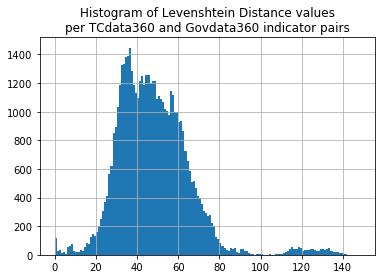

In [188]:
df_name_lower_comp_all['levenshtein_distance'].hist(bins=np.arange(0,df_name_lower_comp_all['levenshtein_distance'].max(),1))
plt.title("Histogram of Levenshtein Distance values\nper TCdata360 and Govdata360 indicator pairs")

(0, 20)

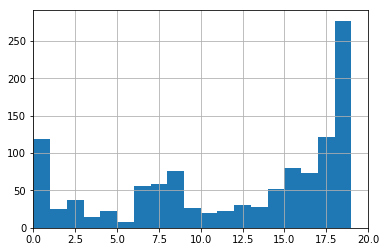

In [190]:
df_name_lower_comp_all['levenshtein_distance'].hist(bins=np.arange(0,20,1))
plt.xlim(0,20)

In [197]:
df_name_lower_comp_all.groupby('gv_indicator').min().index.is_unique

True

In [210]:
df_name_lower_comp_all_top1 = df_name_lower_comp_all.groupby('gv_indicator')['levenshtein_distance'].min()

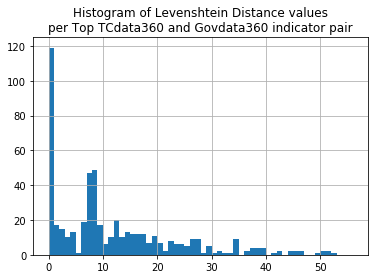

In [211]:
df_name_lower_comp_all_top1.hist(bins=np.arange(0,df_name_lower_comp_all_top1.max(),1))
plt.title("Histogram of Levenshtein Distance values\nper Top TCdata360 and Govdata360 indicator pair")

(0, 10)

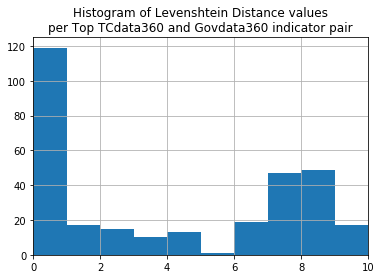

In [212]:
df_name_lower_comp_all_top1.hist(bins=np.arange(0,df_name_lower_comp_all_top1.max(),1))
plt.title("Histogram of Levenshtein Distance values\nper Top TCdata360 and Govdata360 indicator pair")
plt.xlim(0,10)

In [217]:
max_dist = 5
df_name_lower_comp_all_shortlist = df_name_lower_comp_all[df_name_lower_comp_all['levenshtein_distance'] <= max_dist].reset_index(drop=True)

In [223]:
df_name_lower_comp_all_shortlist = df_name_lower_comp_all_shortlist.reset_index()

In [230]:
pd.DataFrame(df_name_lower_comp_all_shortlist['source_dataset'].value_counts())

,source_dataset
"Women, Business and the Law",182
Doing Business,20
Enterprise Surveys,19
Bertelsmann Transformation Index,3
World Economic Forum Global Competitiveness Index,2


In [233]:
tc_shortlist = tc_indicators.merge(df_name_lower_comp_all_shortlist, how='inner', left_on=['name_lower', 'dataset'], right_on=['tc_indicator', 'source_dataset']).drop(['name_norm','source_dataset', 'tc_indicator','gv_indicator'], axis=1)
gv_shortlist = gv_indicators.replace({'dataset': {'Global Competitiveness Index': 'World Economic Forum Global Competitiveness Index'}}).merge(df_name_lower_comp_all_shortlist, how='inner', left_on=['name_lower', 'dataset'], right_on=['gv_indicator', 'source_dataset']).drop(['name_norm','source_dataset', 'tc_indicator','gv_indicator'], axis=1)
merged_shortlist = tc_shortlist.merge(gv_shortlist, how='inner', on=['index', 'levenshtein_distance'], suffixes = ('_tc', '_gv'))
merged_shortlist.to_csv("2017-07-03-Merged-TCdata360-and-Govdata360-indicators-shortlist.csv", index=False)

In [272]:
df_name_lower_comp_all_top5 = df_name_lower_comp_all.groupby('gv_indicator').apply(lambda x: x.sort_values(by='levenshtein_distance', ascending=True).head(5)).reset_index(drop=True)
df_name_lower_comp_all_top5.to_csv("2017-07-03-top5-smallest-levenshtein-scores.csv", index=False)

### Using  `fuzzywuzzy` token_set_ratio and partial_ratio for comparing indicators

In [303]:
dataset = common_datasets[0]
tc_indicators_shortlist = tc_indicators[tc_indicators['dataset'].isin(dataset)]
gv_indicators_shortlist = gv_indicators[gv_indicators['dataset'].isin(dataset)]

tc_list = list(set(tc_indicators_shortlist['name_lower']))
gv_list = list(set(gv_indicators_shortlist['name_lower']))

name_lower_comparison_fuzz = []
for gv_ind in gv_list:
    for tc_ind in tc_list:
        name_lower_comparison_fuzz.append([gv_ind,tc_ind, fuzz.ratio(gv_ind,tc_ind), fuzz.partial_ratio(gv_ind,tc_ind), fuzz.token_sort_ratio(gv_ind,tc_ind),  fuzz.token_set_ratio(gv_ind,tc_ind)])

In [304]:
df_name_lower_comparison_fuzz = pd.DataFrame(name_lower_comparison_fuzz, columns = ['gv_indicator', 'tc_indicator', 'ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio'])

In [305]:
fuzz_stats = ['ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio']

In [310]:
df_name_lower_comparison_fuzz['stat_mean'] = df_name_lower_comparison_fuzz[fuzz_stats].mean(axis=1)

In [311]:
df_rank = df_name_lower_comparison_fuzz.groupby('gv_indicator')[fuzz_stats].rank(axis=0, ascending=False)

In [313]:
df_rank['stat_mean'] = df_rank.mean(axis=1)

In [315]:
df_name_lower_comparison_fuzz_stats = df_name_lower_comparison_fuzz.join(df_rank, rsuffix='_rank')

We generate the fuzzywuzzy statistics for all indicator pairs for all datasets.

In [394]:
df_name_lower_comp_all = pd.DataFrame()
fuzz_stats = ['ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio']
df_cols = ['gv_indicator', 'tc_indicator', 'ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio']

for dataset in common_datasets:
    tc_indicators_shortlist = tc_indicators[tc_indicators['dataset'].isin(dataset)]
    gv_indicators_shortlist = gv_indicators[gv_indicators['dataset'].isin(dataset)]

    tc_list = list(set(tc_indicators_shortlist['name_lower']))
    gv_list = list(set(gv_indicators_shortlist['name_lower']))

    name_lower_comparison_fuzz = []
    for gv_ind in gv_list:
        for tc_ind in tc_list:
            name_lower_comparison_fuzz.append([gv_ind,tc_ind, fuzz.ratio(gv_ind,tc_ind), fuzz.partial_ratio(gv_ind,tc_ind), fuzz.token_sort_ratio(gv_ind,tc_ind),  fuzz.token_set_ratio(gv_ind,tc_ind)])
        
    df_name_lower_comparison_fuzz = pd.DataFrame(name_lower_comparison_fuzz, columns = df_cols)
    df_name_lower_comparison_fuzz['stat_mean'] = df_name_lower_comparison_fuzz[fuzz_stats].mean(axis=1)
    df_name_lower_comparison_fuzz['stat_min'] = df_name_lower_comparison_fuzz[fuzz_stats].min(axis=1)
    df_name_lower_comparison_fuzz['stat_max'] = df_name_lower_comparison_fuzz[fuzz_stats].max(axis=1)
#     df_rank = df_name_lower_comparison_fuzz.groupby('gv_indicator')[fuzz_stats].rank(axis=0, ascending=False)
#     df_rank['stat_mean'] = df_rank.mean(axis=1)
#     df_name_lower_comparison_fuzz_stats = df_name_lower_comparison_fuzz.join(df_rank, rsuffix='_rank')

    df_name_lower_comparison_fuzz['source_dataset'] = dataset[0]
    df_name_lower_comp_all = df_name_lower_comp_all.append(df_name_lower_comparison_fuzz)

In [399]:
df_name_lower_comp_all.head()

,gv_indicator,tc_indicator,ratio,partial_ratio,token_sort_ratio,token_set_ratio,stat_mean,stat_min,stat_max,source_dataset
0,private enterprise,market-based competition,19,22,29,29,24.75,19,29,Bertelsmann Transformation Index
1,private enterprise,private enterprise,100,100,100,100,100.00,100,100,Bertelsmann Transformation Index
2,private enterprise,anti-monopoly policy,26,28,32,32,29.50,26,32,Bertelsmann Transformation Index
3,state identity,market-based competition,37,50,37,37,40.25,37,50,Bertelsmann Transformation Index
4,state identity,private enterprise,50,57,50,50,51.75,50,57,Bertelsmann Transformation Index


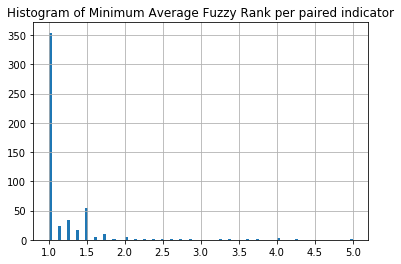

In [332]:
df_name_lower_comp_all.groupby('gv_indicator')['stat_mean_rank'].min().hist(bins=100)
plt.title('Histogram of Minimum Average Fuzzy Rank per paired indicator')

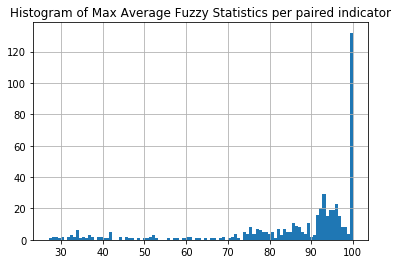

In [333]:
df_name_lower_comp_all.groupby('gv_indicator')['stat_mean'].max().hist(bins=100)
plt.title('Histogram of Max Average Fuzzy Statistics per paired indicator')

(95, 100)

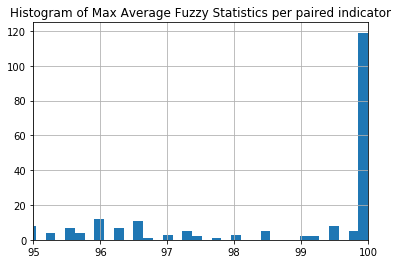

In [336]:
df_name_lower_comp_all.groupby('gv_indicator')['stat_mean'].max().hist(bins=500)
plt.title('Histogram of Max Average Fuzzy Statistics per paired indicator')
plt.xlim(95,100)

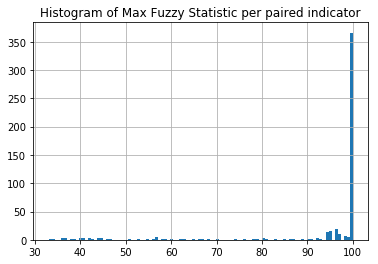

In [395]:
df_name_lower_comp_all.groupby('gv_indicator')['stat_max'].max().hist(bins=100)
plt.title('Histogram of Max Fuzzy Statistic per paired indicator')

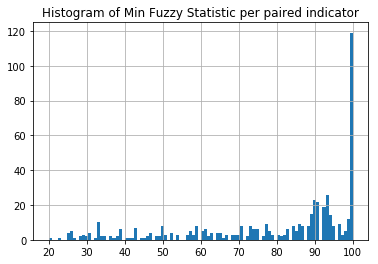

In [396]:
df_name_lower_comp_all.groupby('gv_indicator')['stat_min'].max().hist(bins=100)
plt.title('Histogram of Min Fuzzy Statistic per paired indicator')

In [401]:
df_name_lower_comp_all.groupby('gv_indicator').apply(lambda x: x.sort_values(by='stat_mean', ascending=False).head(1)).reset_index(drop=True)

,gv_indicator,tc_indicator,ratio,partial_ratio,token_sort_ratio,token_set_ratio,stat_mean,stat_min,stat_max,source_dataset
0,1 corporate ethics,"efficacy of corporate boards, 1-7 (best)",45,67,55,76,60.75,45,76,World Economic Forum Global Competitiveness Index
1,1 domestic competition,"intensity of local competition, 1-7 (best)",47,68,52,74,60.25,47,74,World Economic Forum Global Competitiveness Index
2,1 property rights,"property rights, 1-7 (best)",68,88,83,100,84.75,68,100,World Economic Forum Global Competitiveness Index
3,101 property rights 17 best,"property rights, 1-7 (best)",85,85,94,94,89.50,85,94,World Economic Forum Global Competitiveness Index
4,102 intellectual property protection 17 best,"intellectual property protection, 1-7 (best)",91,91,96,96,93.50,91,96,World Economic Forum Global Competitiveness Index
5,103 diversion of public funds 17 best,"diversion of public funds, 1-7 (best)",89,89,96,96,92.50,89,96,World Economic Forum Global Competitiveness Index
6,104 public trust in politicians 17 best,"public trust in politicians, 1-7 (best)",90,90,96,96,93.00,90,96,World Economic Forum Global Competitiveness Index
7,105 irregular payments and bribes 17 best,"irregular payments and bribes, 1-7 (best)",90,90,96,96,93.00,90,96,World Economic Forum Global Competitiveness Index
8,106 judicial independence 17 best,"judicial independence, 1-7 (best)",88,88,95,95,91.50,88,95,World Economic Forum Global Competitiveness Index
9,108 wastefulness of government spending 17 best,"wastefulness of government spending, 1-7 (best)",91,91,97,97,94.00,91,97,World Economic Forum Global Competitiveness Index


In [402]:
df_name_lower_comp_fuzz_top1 = df_name_lower_comp_all.groupby('gv_indicator').apply(lambda x: x.sort_values(by='stat_mean', ascending=False).head(1)).reset_index(drop=True)
# df_name_lower_comp_fuzz_top5.to_csv("2017-07-03-top5-smallest-levenshtein-scores.csv", index=False)

In [404]:
df_name_lower_comp_fuzz_top1_filtered = df_name_lower_comp_fuzz_top1[(df_name_lower_comp_fuzz_top1['stat_mean'] >= 70) & (df_name_lower_comp_fuzz_top1['stat_min'] >= 70)  & (df_name_lower_comp_fuzz_top1['stat_max'] > 80)].reset_index(drop=True).reset_index()

In [364]:
# df_name_lower_comp_fuzz_top1_filtered = df_name_lower_comp_fuzz_top1[(df_name_lower_comp_fuzz_top1['stat_mean'] >= 75)| ((df_name_lower_comp_fuzz_top1['stat_mean'] < 75) & ((df_name_lower_comp_fuzz_top1['ratio'] == 100) | (df_name_lower_comp_fuzz_top1['partial_ratio'] == 100) | (df_name_lower_comp_fuzz_top1['token_sort_ratio'] == 100) | (df_name_lower_comp_fuzz_top1['token_set_ratio'] == 100)))].reset_index(drop=True).reset_index()

In [405]:
df_name_lower_comp_fuzz_top1_filtered.head()

,index,gv_indicator,tc_indicator,ratio,partial_ratio,token_sort_ratio,token_set_ratio,stat_mean,stat_min,stat_max,source_dataset
0,0,101 property rights 17 best,"property rights, 1-7 (best)",85,85,94,94,89.5,85,94,World Economic Forum Global Competitiveness Index
1,1,102 intellectual property protection 17 best,"intellectual property protection, 1-7 (best)",91,91,96,96,93.5,91,96,World Economic Forum Global Competitiveness Index
2,2,103 diversion of public funds 17 best,"diversion of public funds, 1-7 (best)",89,89,96,96,92.5,89,96,World Economic Forum Global Competitiveness Index
3,3,104 public trust in politicians 17 best,"public trust in politicians, 1-7 (best)",90,90,96,96,93.0,90,96,World Economic Forum Global Competitiveness Index
4,4,105 irregular payments and bribes 17 best,"irregular payments and bribes, 1-7 (best)",90,90,96,96,93.0,90,96,World Economic Forum Global Competitiveness Index


In [410]:
pd.DataFrame(df_name_lower_comp_fuzz_top1_filtered['source_dataset'].value_counts().sort_index())

,source_dataset
Bertelsmann Transformation Index,3
Doing Business,56
Enterprise Surveys,103
"Women, Business and the Law",131
World Economic Forum Global Competitiveness Index,82
Worldwide Governance Indicators,1


In [409]:
df_name_lower_comp_fuzz_top1_filtered.shape

(376, 11)

In [411]:
df_name_lower_comp_fuzz_top1_filtered.to_csv("2017-07-03-top1-matched-indicators-shortlist-fuzzystats-v2.csv", index=False)

In [412]:
df_name_lower_comp_fuzz_top1_filtered_short = df_name_lower_comp_fuzz_top1_filtered[['index', 'gv_indicator', 'tc_indicator', 'source_dataset']]

In [413]:
tc_shortlist_fuzz = tc_indicators.merge(df_name_lower_comp_fuzz_top1_filtered_short, how='inner', left_on=['name_lower', 'dataset'], right_on=['tc_indicator', 'source_dataset']).drop(['name_norm','source_dataset', 'tc_indicator','gv_indicator'], axis=1)
gv_shortlist_fuzz = gv_indicators.replace({'dataset': {'Global Competitiveness Index': 'World Economic Forum Global Competitiveness Index'}}).merge(df_name_lower_comp_fuzz_top1_filtered_short, how='inner', left_on=['name_lower', 'dataset'], right_on=['gv_indicator', 'source_dataset']).drop(['name_norm','source_dataset', 'tc_indicator','gv_indicator'], axis=1)

In [414]:
merged_shortlist_fuzz = tc_shortlist_fuzz.merge(gv_shortlist_fuzz, how='inner', on=['index'], suffixes = ('_tc', '_gv'))
merged_shortlist_fuzz = merged_shortlist_fuzz.merge(df_name_lower_comp_fuzz_top1_filtered, on='index')

In [415]:
merged_shortlist_fuzz.head()

,byPartner_tc,byProduct_tc,dataset_tc,datasetId_tc,dateRange_tc,defaultViz_tc,definition_tc,doNotUseViz_tc,id_tc,name_tc,...,gv_indicator,tc_indicator,ratio,partial_ratio,token_sort_ratio,token_set_ratio,stat_mean,stat_min,stat_max,source_dataset
0,False,False,World Economic Forum Global Competitiveness Index,53,2007-2016,line_chart,The GCI analyses competitiveness along 12 pill...,"[spider_chart, slope_graph, chord_diagram]",631,Global Competitiveness Index,...,global competitiveness index,global competitiveness index,100,100,100,100,100.00,100,100,World Economic Forum Global Competitiveness Index
1,False,False,World Economic Forum Global Competitiveness Index,53,2007-2016,line_chart,The GCI analyses competitiveness along 12 pill...,"[spider_chart, chord_diagram]",632,Global Competitiveness Index,...,global competitiveness index,global competitiveness index,100,100,100,100,100.00,100,100,World Economic Forum Global Competitiveness Index
2,False,False,World Economic Forum Global Competitiveness Index,53,2007-2016,line_chart,"In your country, how would you characterize co...","[spider_chart, slope_graph, chord_diagram]",519,"Extent of market dominance, 1-7 (best)",...,602 extent of market dominance 17 best,"extent of market dominance, 1-7 (best)",89,89,93,94,91.25,89,94,World Economic Forum Global Competitiveness Index
3,False,False,World Economic Forum Global Competitiveness Index,53,2007-2016,line_chart,"In your country, how would you characterize co...","[spider_chart, chord_diagram]",520,"Extent of market dominance, 1-7 (best)",...,602 extent of market dominance 17 best,"extent of market dominance, 1-7 (best)",89,89,93,94,91.25,89,94,World Economic Forum Global Competitiveness Index
4,False,False,Enterprise Surveys,49,2005-2016,line_chart,Average number of days to clear imports from c...,"[spider_chart, slope_graph, chord_diagram]",315,Days to clear imports from customs,...,days to clear imports from customs*,days to clear imports from customs,99,100,100,100,99.75,99,100,Enterprise Surveys


In [416]:
merged_shortlist_fuzz.columns

Index(['byPartner_tc', 'byProduct_tc', 'dataset_tc', 'datasetId_tc',
       'dateRange_tc', 'defaultViz_tc', 'definition_tc', 'doNotUseViz_tc',
       'id_tc', 'name_tc', 'periodicity_tc', 'rank_tc', 'subindicatorType_tc',
       'timeframes_tc', 'units_tc', 'valueType_tc', 'name_lower_tc', 'index',
       'byPartner_gv', 'byProduct_gv', 'dataset_gv', 'datasetId_gv',
       'dateRange_gv', 'defaultViz_gv', 'definition_gv', 'doNotUseViz_gv',
       'id_gv', 'name_gv', 'periodicity_gv', 'rank_gv', 'subindicatorType_gv',
       'timeframes_gv', 'units_gv', 'valueType_gv', 'name_lower_gv',
       'gv_indicator', 'tc_indicator', 'ratio', 'partial_ratio',
       'token_sort_ratio', 'token_set_ratio', 'stat_mean', 'stat_min',
       'stat_max', 'source_dataset'],
      dtype='object')

In [417]:
merged_shortlist_fuzz.to_csv("2017-07-03-Merged-TCdata360-and-Govdata360-indicators-shortlist-fuzzystats-v2.csv", index=False)